# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [4]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [6]:
#Read in data from source 
df_raw = pd.read_csv("../admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [ ]:
#function

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of the GRE is 800, while it's 4 for GPA.

#### Question 4. Drop data points with missing data


In [7]:
print(len(df_raw))
df_clean = df_raw.dropna()
df_clean.head()
print(len(df_clean))

# df_raw.dropna?

400
397


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer:  len(df_raw) - len(df_clean) = 3 rows with missing data

#### Question 6. Create box plots for GRE and GPA

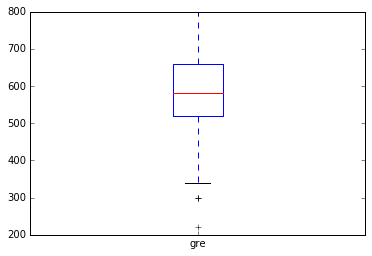

In [26]:
df_clean["gre"].plot(kind="box")

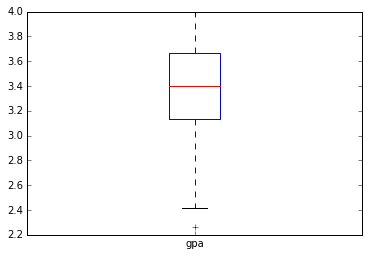

In [27]:
df_clean["gpa"].plot(kind="box")

#### Question 7. What do this plots show?

Answer: The distributon of values for these properties, by 25 & 75 percentile, and the outliers.

#### Question 8. Describe each distribution 

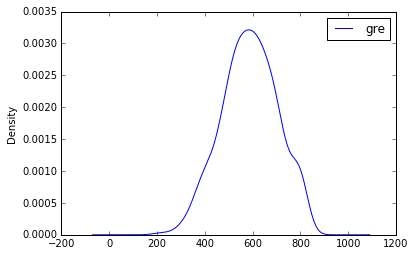

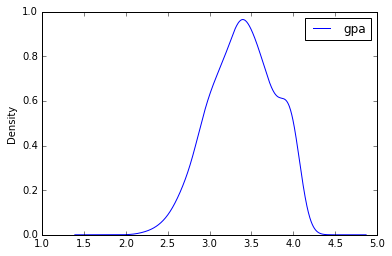

In [32]:
# plot the distribution of each variable 
df_clean[["gre"]].plot(kind="density")
df_clean[["gpa"]].plot(kind="density")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cf85080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11dbc2128>]], dtype=object)

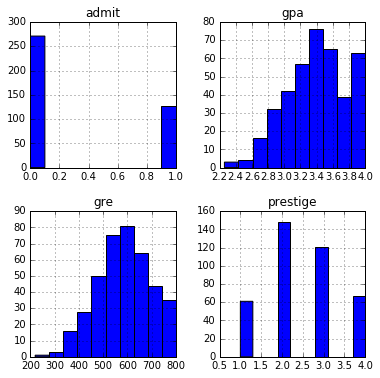

In [22]:
df_clean.hist(figsize=(6,6))

In [28]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
linear_gre = smf.ols(formula='admit ~ gre', data=df_clean).fit()

#print the full summary
linear_gre.summary()

# linear_gre.params
# linear_gre.pvalues


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     13.41
Date:                Thu, 16 Jun 2016   Prob (F-statistic):           0.000284
Time:                        21:30:08   Log-Likelihood:                -253.09
No. Observations:                 397   AIC:                             510.2
Df Residuals:                     395   BIC:                             518.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1116      0.119     -0.935      0.350        -0.346     0.123
gre            0.0007      0.000      3.662      0.000         0.000     0.001
==============================================================================
Omnibus:                      584.346   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.492
Skew:                           0.742   Prob(JB):                     9.90e-15
Kurtosis:                       1.697   Cond. No.                     3.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
linear_gre.pvalues

Intercept    0.350398
gre          0.000284
dtype: float64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: The GPA and GRE are are not normal because there is a maximum of 4.0 for gpa and 800 for GRE.  This makes the models skewed to the right.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: These distributions are roughly normal.  Removing the outliers will normalize the GRE and GPA distributions.

#### Question 11. Which of our variables are potentially colinear? 

In [15]:
# create a correlation matrix for the data

df_clean.corr()

# GRE and GPA are possible collinear.

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer:  GRE and GPA are possible collinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Perform a linear regression with predictive variables.

#### Question 14. What is your hypothesis? 

Answer:  GPA, GRE and prestige are positively associated with admission status.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c8c7470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ba41358>]], dtype=object)

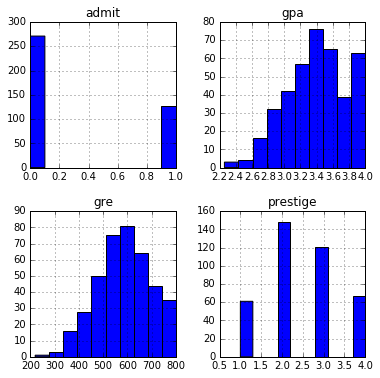

In [21]:
# # visualize the relationship between the features and the response using scatterplots
# fig, axs = plt.subplots(1, 3, sharey=True)
# df_clean.plot(kind='scatter', x='admit', y='gre', ax=axs[0], figsize=(16, 8))
# df_clean.plot(kind='scatter', x='gpa', y='admit', ax=axs[1])
# df_clean.plot(kind='scatter', x='prestige', y='admit', ax=axs[2])

df_clean.hist(figsize=(6,6))

In [12]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='admit ~ gre + gpa + prestige', data=df_clean).fit()

#print the full summary
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Sat, 18 Jun 2016   Prob (F-statistic):           1.65e-08
Time:                        18:00:20   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462        -0.591     0.269
gre            0.0004      0.000      2.063      0.040      2.05e-05     0.001
gpa            0.1462      0.064      2.296      0.022         0.021     0.271
prestige      -0.1097      0.024     -4.606      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion
* gre, prestige, and gpa are probably associated with admission status

In [32]:
lm.params["Intercept"]

IndexError: invalid index to scalar variable.

-0.161016889178
0.000434278533452


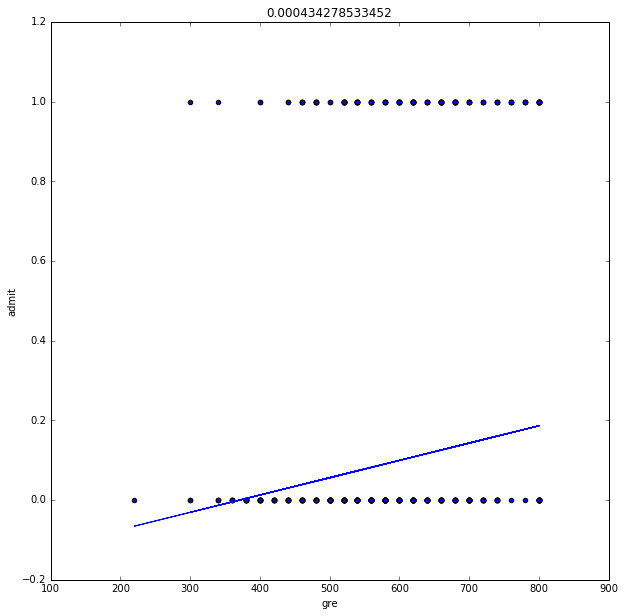

In [37]:
intercept,slope = lm.params["Intercept"], lm.params["gre"]
print(intercept)
print(slope)

abLineVals = []
for point in df_clean['gre']:
    abLineVals.append(slope*point + intercept)
    
df_clean.plot(kind='scatter', x='gre', y='admit',figsize=(10, 10))
plt.plot(df_clean['gre'], abLineVals)
plt.title(slope)
plt.show()
    

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data